# Explore the reference network


- [Crossref](https://www.crossref.org/) provides an API to get the references of a publication ([rest-api-doc](https://github.com/CrossRef/rest-api-doc)).


- The idea is to go down the references network for a fixed number of steps (for example 3), then keep only the articles which have been visited more than N times (for examples 3 times), and draw the upward graph starting from these articles. 


## To do:
- resolve identical label
- stats:  n ref vs n citation, review vs foundational
- coloring: disconnected component for the 1st generation references, authors based cluster 
- interactive flask app


## With more data:
- use 'store' from scopus manual export + [query ref resolver](https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/)

- get country/city/univ  get flag/favicon





In [1]:
import crossrefexp as exp

In [2]:
store = exp.MetaDataStore('data/metadata_cache01.pickle')

53 metadata loaded from `data/metadata_cache01.pickle`


In [3]:
# Query metadata on Crossref
store.query(['10.1063/1.3284082', '10.1063/1.3284086','10.1063/1.3284083' ])

  1/3: 10.1063/1.3284082 already present.
  2/3: 10.1063/1.3284086 already present.
  3/3: 10.1063/1.3284083 already present.
data/metadata_cache01.pickle saved.


growth achieved - 49 nodes in the graph. The last generation number is 1.
growth achieved - 686 nodes in the graph. The last generation number is 2.
graphs/Lepadatu2010_gen2_top2.svg  saved


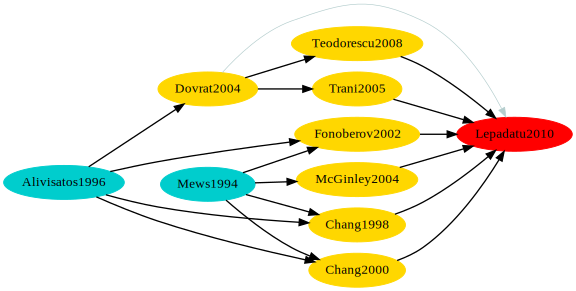

In [4]:
# Build the graph and everything:
gr = store.get_refgraphviz( '10.1063/1.3284083', gen=2, top=2 )
gr

In [5]:
# List of the top cited refs.
gr = store.build_a_refgraph( '10.1063/1.3284083', gen=2 )
print('-- Top cited: --')
for doi, citedby_count in gr.most_cited()[:10]:
    metadata = store.get(doi)
    print( '{}\t cited {} times [gen{}]  {}'.format(metadata.label(),
                                                   citedby_count, 
                                                   gr[doi]['gen'],
                                                   metadata.get('URL')) )

growth achieved - 49 nodes in the graph. The last generation number is 1.
growth achieved - 686 nodes in the graph. The last generation number is 2.
-- Top cited: --
Mews1994	 cited 4 times [gen2]  http://dx.doi.org/10.1021/j100054a032
Alivisatos1996	 cited 4 times [gen2]  http://dx.doi.org/10.1126/science.271.5251.933
19995	 cited 4 times [gen2]  None
62971	 cited 3 times [gen2]  None
54128	 cited 3 times [gen2]  None
53465	 cited 3 times [gen2]  None
87051	 cited 3 times [gen2]  None
63503	 cited 3 times [gen2]  None
Yoffe2001	 cited 3 times [gen1]  http://dx.doi.org/10.1080/00018730010006608
Dovrat2004	 cited 3 times [gen1]  http://dx.doi.org/10.1103/physrevb.69.155311
